# Part II - Ford GoBike System Data Explanatory
## by Quang

## Investigation Overview


> The objective of this investigation is to analyze and provide insights into the Ford GoBike System data, which includes information on bike-sharing trips duration, user types, and member information.


## Dataset Overview and Executive Summary

> The dataset include 183412 records about individual rides with 16 variables to describe a record.
> This section will summarize the main findings and insights related to trip duration, user types and member information.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


**Cleaning data process**

In [3]:
import datetime

current_year = datetime.datetime.now().year
df['member_age'] = current_year - df['member_birth_year']

#set missing values of 'member_age' to median
age_median = df['member_age'].median()
df['member_age'] = df['member_age'].fillna(age_median)
df['member_age'] = df['member_age'].astype('int64')
df['start_time'] = pd.to_datetime(df['start_time'])     
df['hour'] = df['start_time'].dt.hour

# fille na gender with other
df['member_gender'] = df['member_gender'].fillna('Other')

In [4]:
df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,39,17
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,Other,No,36,18
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,51,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,34,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,49,23


In [6]:
#common functions

def chart_labels(title, xlabel, ylabel):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

**1. What time of day typically experiences the highest number of rides?**

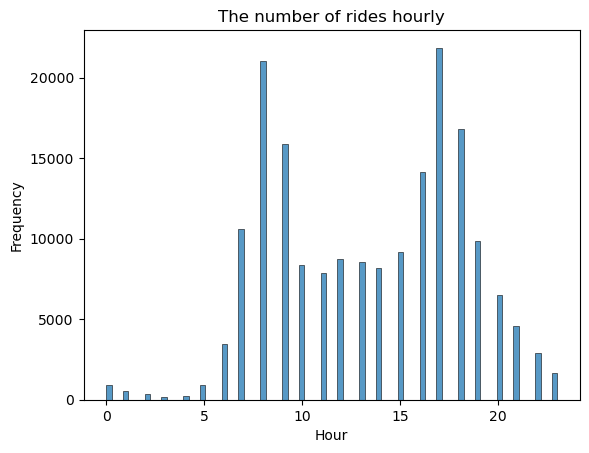

In [7]:
sns.histplot(data=df, x='hour')
chart_labels('The number of rides hourly','Hour','Frequency')

The Plot showed the number of rides over a 24-hour period. The chart clearly indicated two peak hours, which are 8 AM and 5 PM. At 8 AM, we observe a surge in demand due to the morning rush hour, as people are commuting to work or appointments. Similarly, at 5 PM, there's another surge in demand as people are finishing work and need rides to get home or to various destinations.

**2. What is the relationship or correlation between user type and gender?**

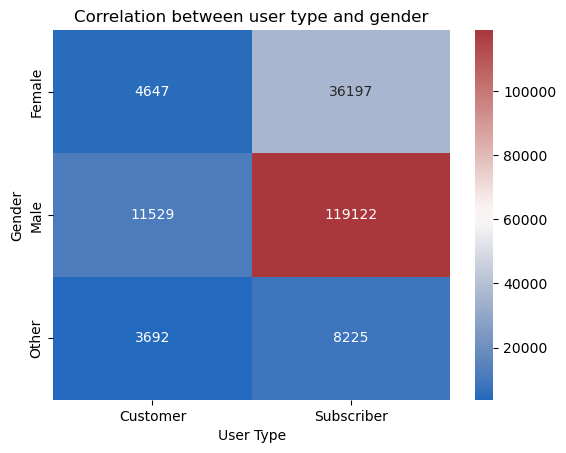

In [8]:
df_pivoted = df.pivot_table('duration_sec', 'member_gender', 'user_type', aggfunc="count")
sns.heatmap(data=df_pivoted, annot=True, fmt=".0f", cmap='vlag')
chart_labels('Correlation between user type and gender','User Type','Gender')

The number of subscriber users is greater than that of customer users, and the number of male users is higher than that of female users. Furthermore, there is a significant number of male subscribers.

**3. What is the correlation between trip duration, customer type and gender?**

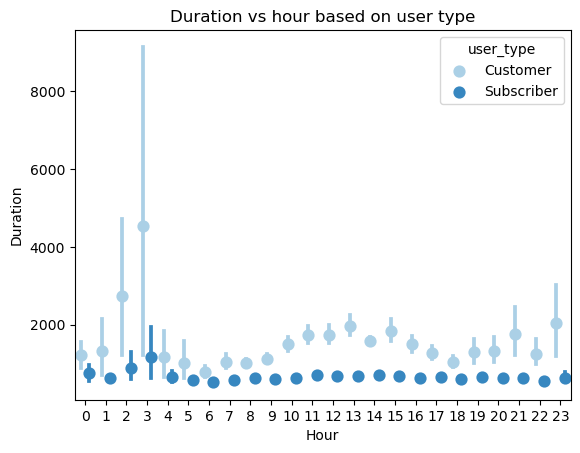

In [9]:
sns.pointplot(data=df, x='hour', y='duration_sec', hue='user_type',
              palette = 'Blues', linestyles='', dodge=0.4)
chart_labels('Duration vs hour based on user type','Hour','Duration')

Customer users tend to take longer trips than Subscriber users. 
Users tend to take longer trips on Saturdays and Sundays.

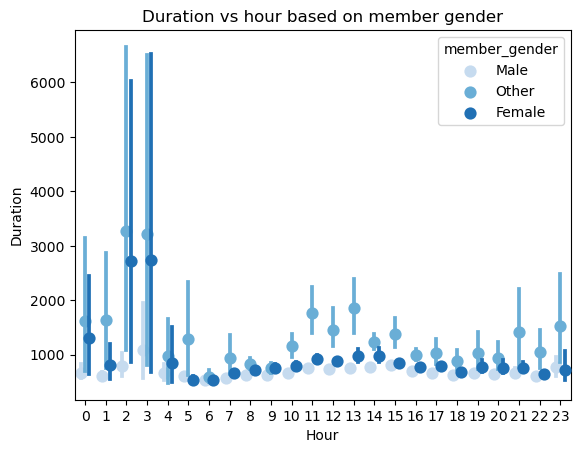

In [10]:
sns.pointplot(data=df, x='hour', y='duration_sec', hue='member_gender',
              palette = 'Blues', linestyles='', dodge=0.4)
chart_labels('Duration vs hour based on member gender','Hour','Duration')

Female more likely to ride bikes longer than Male.